In [85]:
import tensorflow as tf
tf.__version__
from tensorflow import keras


from tensorflow.keras import layers

In [86]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [87]:
print(len(train_data))

print(len(test_data))


8982
2246


In [88]:
train_data[10]


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [89]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in     train_data[0]])

In [90]:
train_labels[10]


3

In [91]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [92]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [93]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [94]:
from tensorflow import keras


In [95]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [96]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [97]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [99]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 0.1098 - accuracy: 0.9569 - val_loss: 1.0665 - val_accuracy: 0.8090
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 0.1110 - accuracy: 0.9570 - val_loss: 1.1613 - val_accuracy: 0.8090
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 0.1076 - accuracy: 0.9568 - val_loss: 1.1365 - val_accuracy: 0.8070
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.1035 - accuracy: 0.9568 - val_loss: 1.0615 - val_accuracy: 0.8100
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.1033 - accuracy: 0.9578 - val_loss: 1.1965 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.0983 - accuracy: 0.9583 - val_loss: 1.1286 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.1028 - accuracy: 0.9574 - val_loss: 1.1953 - val_accuracy: 0.7930
Epoch 8/20
16

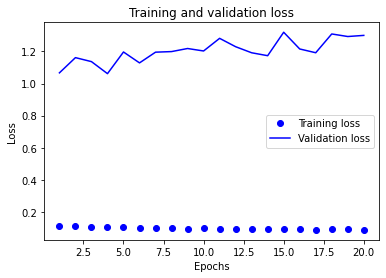

In [101]:
from matplotlib import pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

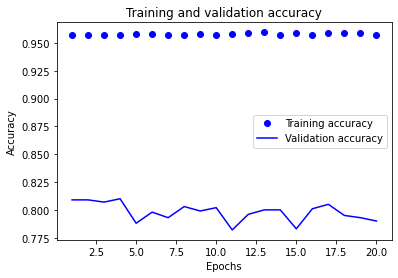

In [102]:
from matplotlib import pyplot as plt

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [103]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 46ms/step - loss: 2.4448 - accuracy: 0.5429
Epoch 2/9
18/18 [==============================] - 1s 47ms/step - loss: 1.3233 - accuracy: 0.7170
Epoch 3/9
18/18 [==============================] - 1s 46ms/step - loss: 0.9858 - accuracy: 0.7886
Epoch 4/9
18/18 [==============================] - 1s 46ms/step - loss: 0.7639 - accuracy: 0.8371
Epoch 5/9
18/18 [==============================] - 1s 46ms/step - loss: 0.6020 - accuracy: 0.8735
Epoch 6/9
18/18 [==============================] - 1s 46ms/step - loss: 0.4763 - accuracy: 0.9009
Epoch 7/9
18/18 [==============================] - 1s 46ms/step - loss: 0.3825 - accuracy: 0.9207
Epoch 8/9
18/18 [==============================] - 1s 46ms/step - loss: 0.3103 - accuracy: 0.9329
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9297 - accuracy: 0.7974


In [104]:
results


[0.9297046661376953, 0.7974176406860352]

In [105]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()


0.18076580587711488

In [106]:
predictions = model.predict(x_test)

In [107]:
predictions[0].shape


(46,)

In [108]:
np.sum(predictions[0])

1.0000001

In [109]:
np.argmax(predictions[0])


3

In [110]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [111]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [112]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 26ms/step - loss: 3.0485 - accuracy: 0.3076 - val_loss: 2.2558 - val_accuracy: 0.5710
Epoch 2/20
63/63 [==============================] - 1s 23ms/step - loss: 1.8360 - accuracy: 0.6060 - val_loss: 1.6583 - val_accuracy: 0.6050
Epoch 3/20
63/63 [==============================] - 1s 24ms/step - loss: 1.4202 - accuracy: 0.6477 - val_loss: 1.4672 - val_accuracy: 0.6480
Epoch 4/20
63/63 [==============================] - 2s 34ms/step - loss: 1.2103 - accuracy: 0.7031 - val_loss: 1.3892 - val_accuracy: 0.6890
Epoch 5/20
63/63 [==============================] - 2s 25ms/step - loss: 1.0702 - accuracy: 0.7311 - val_loss: 1.3264 - val_accuracy: 0.7040
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9728 - accuracy: 0.7466 - val_loss: 1.3279 - val_accuracy: 0.6980
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8946 - accuracy: 0.7601 - val_loss: 1.3337 - val_accuracy: 0.6970
Epoch 8/20
63

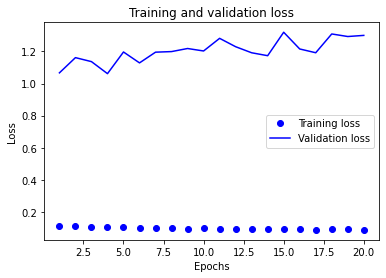

In [113]:
from matplotlib import pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

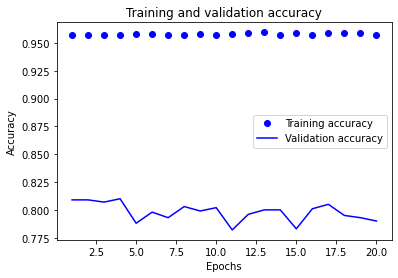

In [114]:
from matplotlib import pyplot as plt

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [115]:
results

[0.9297046661376953, 0.7974176406860352]

In [116]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19367764915405164

In [118]:
predictions = model.predict(x_test)